# Assignment 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Question 1

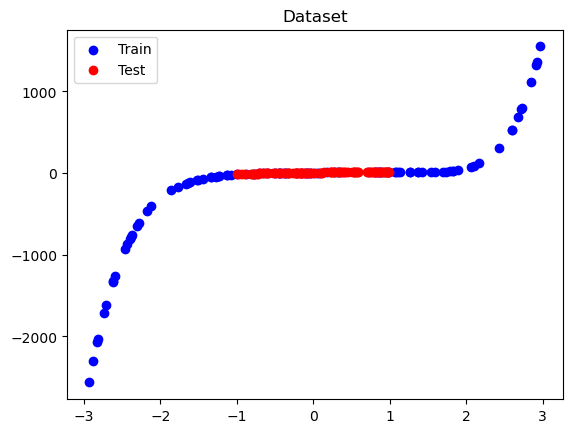

In [23]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")

plt.title("Dataset")
plt.scatter(x_train, y_train, color="blue")
plt.scatter(x_test, y_test, color="red")
plt.legend(["Train", "Test"])
plt.show()